<a href="https://colab.research.google.com/github/shkimusw/bigdata/blob/main/%5B13%EC%A3%BC%EC%B0%A8_%EA%B0%95%EC%9D%98%5D_%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#대중교통 데이터 원하는대로 조회하기

구글에 '티머니 교통통계자료' 라고 검색해서 나오는 첫 링크에 들어가서 가장 최신 파일을 다운받아보자.

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)


In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [1]:
from google.colab import files
uploaded=files.upload()

Saving subwaytime.csv to subwaytime.csv


In [2]:
import pandas as pd

In [ ]:
subway_data = pd.read_csv('subwaytime.csv', encoding='cp949', thousands=',')
subway_data

In [4]:
#작업일시 열 삭제
del subway_data['작업일시']

In [5]:
subway_data

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2022-10,1호선,150.0,서울역,707,34,"9,180","9,659","13,511","55,432",...,"26,783","14,843","2,421","2,533",2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,"2,364","5,063","3,908","26,854",...,"10,639","3,367",405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,"3,990","4,469","4,237","22,659",...,"28,401","4,125",995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,"4,334","3,280","4,065","13,620",...,"18,163","4,564","1,367","1,716",6,20,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,"1,424",147,"3,586",922,...,860,"3,464",196,"1,036",0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,"1,002",561,...,650,"2,011",176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,"1,975",116,"3,075",612,...,341,"3,567",94,"1,218",0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,"4,730",211,"6,998","2,347",...,"1,512","8,955",302,"3,975",0,163,0,0,0,0


열 이름을 보기좋게 바꿔보자.

In [6]:
column_names = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4, 24):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')

for i in range(0,4):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')


In [ ]:
column_names

In [7]:
#위에서 만든 열 이름을 데이터에 붙인다.
subway_data.columns = column_names
subway_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2022-10,1호선,150.0,서울역,707,34,"9,180","9,659","13,511","55,432",...,"26,783","14,843","2,421","2,533",2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,"2,364","5,063","3,908","26,854",...,"10,639","3,367",405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,"3,990","4,469","4,237","22,659",...,"28,401","4,125",995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,"4,334","3,280","4,065","13,620",...,"18,163","4,564","1,367","1,716",6,20,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,"1,424",147,"3,586",922,...,860,"3,464",196,"1,036",0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,"1,002",561,...,650,"2,011",176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,"1,975",116,"3,075",612,...,341,"3,567",94,"1,218",0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,"4,730",211,"6,998","2,347",...,"1,512","8,955",302,"3,975",0,163,0,0,0,0


인덱스 0을 삭제해보자.

In [ ]:
subway_data=subway_data.drop([0])
subway_data

nan 값이 있는 경우 dropna 명령어를 사용할 수도 있다.

In [ ]:
subway_data.dropna()

데이터의 기본정보를 파악해보자.

In [10]:
# 데이터프레임의 기본정보
subway_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     615 non-null    object 
 1   호선명     615 non-null    object 
 2   역ID     615 non-null    float64
 3   지하철역    615 non-null    object 
 4   4시 승차   615 non-null    object 
 5   4시 하차   615 non-null    object 
 6   5시 승차   615 non-null    object 
 7   5시 하차   615 non-null    object 
 8   6시 승차   615 non-null    object 
 9   6시 하차   615 non-null    object 
 10  7시 승차   615 non-null    object 
 11  7시 하차   615 non-null    object 
 12  8시 승차   615 non-null    object 
 13  8시 하차   615 non-null    object 
 14  9시 승차   615 non-null    object 
 15  9시 하차   615 non-null    object 
 16  10시 승차  615 non-null    object 
 17  10시 하차  615 non-null    object 
 18  11시 승차  615 non-null    object 
 19  11시 하차  615 non-null    object 
 20  12시 승차  615 non-null    object 
 21  12시 하차  615 non-null    object 
 22  13

승하차 정보가 문자로 저장되어 있는데 int로 변경해보자.

In [11]:
subway_data.iloc[:, range(4, 52)] = subway_data.iloc[:, range(4, 52)].astype(int)
subway_data.info()

ValueError: ignored

에러가 난다. 숫자의 컴마가 완전히 제거되지 않는 것이 문제이다.
먼저 열을 선택하여 컴마를 제거한다.

In [12]:
temp=subway_data.iloc[:, range(4,52)]

In [ ]:
temp

In [13]:
temp = temp.apply(lambda x: x.str.replace(',', ''))

In [14]:
temp

,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,7시 승차,7시 하차,8시 승차,8시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,707,34,9180,9659,13511,55432,40840,105943,71256,205484,...,26783,14843,2421,2533,2,172,0,0,0,0
2,112,0,2364,5063,3908,26854,7253,62283,9735,175247,...,10639,3367,405,797,1,16,0,0,0,0
3,97,5,3990,4469,4237,22659,6536,91028,10505,225517,...,28401,4125,995,712,0,0,0,0,0,0
4,219,18,4334,3280,4065,13620,5288,24619,10205,68144,...,18163,4564,1367,1716,6,20,0,0,0,0
5,37,0,1894,3542,3029,15796,5328,39957,9058,92084,...,7388,2837,342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,0,1424,147,3586,922,10552,2713,15224,6410,...,860,3464,196,1036,0,0,0,0,0,0
612,1,0,709,170,1002,561,3448,1237,6183,2023,...,650,2011,176,675,0,1,0,0,0,0
613,1,0,1975,116,3075,612,10973,1180,17253,1650,...,341,3567,94,1218,0,0,0,0,0,0
614,0,0,4730,211,6998,2347,22640,5122,31353,7794,...,1512,8955,302,3975,0,163,0,0,0,0


앞의 4 열을 rush_data에 저장한다.

In [15]:
rush_data=subway_data.iloc[:,range(0,4)]
rush_data

,사용월,호선명,역ID,지하철역
1,2022-10,1호선,150.0,서울역
2,2022-10,1호선,151.0,시청
3,2022-10,1호선,152.0,종각
4,2022-10,1호선,153.0,종로3가
5,2022-10,1호선,154.0,종로5가
...,...,...,...,...
611,2022-10,신림선,4407.0,당곡
612,2022-10,신림선,4408.0,신림
613,2022-10,신림선,4409.0,서원
614,2022-10,신림선,4410.0,서울대벤처타운


temp와 rush_data를 합쳐준다.

In [16]:
time_data = pd.concat([rush_data, temp], axis=1)

In [17]:
time_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2022-10,1호선,150.0,서울역,707,34,9180,9659,13511,55432,...,26783,14843,2421,2533,2,172,0,0,0,0
2,2022-10,1호선,151.0,시청,112,0,2364,5063,3908,26854,...,10639,3367,405,797,1,16,0,0,0,0
3,2022-10,1호선,152.0,종각,97,5,3990,4469,4237,22659,...,28401,4125,995,712,0,0,0,0,0,0
4,2022-10,1호선,153.0,종로3가,219,18,4334,3280,4065,13620,...,18163,4564,1367,1716,6,20,0,0,0,0
5,2022-10,1호선,154.0,종로5가,37,0,1894,3542,3029,15796,...,7388,2837,342,893,2,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,0,0,1424,147,3586,922,...,860,3464,196,1036,0,0,0,0,0,0
612,2022-10,신림선,4408.0,신림,1,0,709,170,1002,561,...,650,2011,176,675,0,1,0,0,0,0
613,2022-10,신림선,4409.0,서원,1,0,1975,116,3075,612,...,341,3567,94,1218,0,0,0,0,0,0
614,2022-10,신림선,4410.0,서울대벤처타운,0,0,4730,211,6998,2347,...,1512,8955,302,3975,0,163,0,0,0,0


In [18]:
time_data.iloc[:, range(4, 52)] = time_data.iloc[:, range(4, 52)].astype(int)
time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     615 non-null    object 
 1   호선명     615 non-null    object 
 2   역ID     615 non-null    float64
 3   지하철역    615 non-null    object 
 4   4시 승차   615 non-null    int64  
 5   4시 하차   615 non-null    int64  
 6   5시 승차   615 non-null    int64  
 7   5시 하차   615 non-null    int64  
 8   6시 승차   615 non-null    int64  
 9   6시 하차   615 non-null    int64  
 10  7시 승차   615 non-null    int64  
 11  7시 하차   615 non-null    int64  
 12  8시 승차   615 non-null    int64  
 13  8시 하차   615 non-null    int64  
 14  9시 승차   615 non-null    int64  
 15  9시 하차   615 non-null    int64  
 16  10시 승차  615 non-null    int64  
 17  10시 하차  615 non-null    int64  
 18  11시 승차  615 non-null    int64  
 19  11시 하차  615 non-null    int64  
 20  12시 승차  615 non-null    int64  
 21  12시 하차  615 non-null    int64  
 22  13

원하는 통계치 구하기

출근시간대 가장 많은 인원이 이용하는 역을 찾아보자. 출근시간은 7~9시로 설정한다.

In [19]:
time_data.iloc[:, range(10, 16)].max()

7시 승차    183708
7시 하차    136882
8시 승차    273219
8시 하차    347398
9시 승차    170806
9시 하차    289330
dtype: int64

승하차 인원이 분리되어 있으므로 승하차인원을 합산하는 열을 생성하여 데이터프레임을 만들어보자. 일단 7시 인원만 아까 사용했던 rush_data에 붙여보자.

In [20]:
temp_data = pd.DataFrame(time_data.iloc[:, [10, 11]].sum(axis = 1), columns = ['7시 승하차'])
pd.concat([rush_data, temp_data], axis = 1)


,사용월,호선명,역ID,지하철역,7시 승하차
1,2022-10,1호선,150.0,서울역,146783
2,2022-10,1호선,151.0,시청,69536
3,2022-10,1호선,152.0,종각,97564
4,2022-10,1호선,153.0,종로3가,29907
5,2022-10,1호선,154.0,종로5가,45285
...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,13265
612,2022-10,신림선,4408.0,신림,4685
613,2022-10,신림선,4409.0,서원,12153
614,2022-10,신림선,4410.0,서울대벤처타운,27762


8시와 9시에도 반복해보자.

In [21]:
n = 7
for i in range(10, 16, 2):
    columns_name = str(n) + '시 승하차'
    temp_data = pd.DataFrame(time_data.iloc[:, [i, i+1]].sum(axis = 1), columns = [columns_name])
    rush_data = pd.concat([rush_data, temp_data], axis = 1)
    n += 1

rush_data

,사용월,호선명,역ID,지하철역,7시 승하차,8시 승하차,9시 승하차
1,2022-10,1호선,150.0,서울역,146783,276740,213070
2,2022-10,1호선,151.0,시청,69536,184982,106760
3,2022-10,1호선,152.0,종각,97564,236022,156671
4,2022-10,1호선,153.0,종로3가,29907,78349,81944
5,2022-10,1호선,154.0,종로5가,45285,101142,75350
...,...,...,...,...,...,...,...
611,2022-10,신림선,4407.0,당곡,13265,21634,14154
612,2022-10,신림선,4408.0,신림,4685,8206,5986
613,2022-10,신림선,4409.0,서원,12153,18903,11515
614,2022-10,신림선,4410.0,서울대벤처타운,27762,39147,25713


시간별 최대사용인원 역을 찾아보자.

In [22]:
rush_data.iloc[:, [4, 5, 6]].max()

7시 승하차    212118
8시 승하차    403486
9시 승하차    339533
dtype: int64

8시 인원수가 최대인 역은?

In [23]:
rush_data[rush_data['8시 승하차'] == rush_data.iloc[:, [4, 5, 6]].max()[1]]['지하철역']

42    구로디지털단지
Name: 지하철역, dtype: object

#그림
승하차인원 추이를 그려보자.

In [ ]:
get_on_data = time_data.iloc[:, range(4,52,2)]
get_on_data

,4시 승차,5시 승차,6시 승차,7시 승차,8시 승차,9시 승차,10시 승차,11시 승차,12시 승차,13시 승차,...,18시 승차,19시 승차,20시 승차,21시 승차,22시 승차,23시 승차,0시 승차,1시 승차,2시 승차,3시 승차
1,707,9180,13511,40840,71256,61307,62514,77285,84928,85858,...,205513,115319,82912,85422,56471,26783,2421,2,0,0
2,112,2364,3908,7253,9735,12189,14635,20715,24213,32591,...,154910,62838,53970,47960,31231,10639,405,1,0,0
3,97,3990,4237,6536,10505,13644,18618,26998,33812,43796,...,199207,89244,77276,82994,60677,28401,995,0,0,0
4,219,4334,4065,5288,10205,14664,21017,31501,44492,52580,...,100386,62024,49365,51434,40353,18163,1367,6,0,0
5,37,1894,3029,5328,9058,12874,20615,32117,42650,50938,...,96755,52058,36168,32016,21285,7388,342,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,1424,3586,10552,15224,9540,6446,6001,6404,6484,...,7606,4162,3660,2468,1733,860,196,0,0,0
612,1,709,1002,3448,6183,3654,2447,2302,2766,2804,...,3242,2283,1615,1460,1091,650,176,0,0,0
613,1,1975,3075,10973,17253,9978,5858,4792,5209,4722,...,3318,2088,1370,973,726,341,94,0,0,0
614,0,4730,6998,22640,31353,19480,13222,12192,13720,13237,...,12141,6580,4880,4313,3962,1512,302,0,0,0


In [ ]:
get_off_data = time_data.iloc[:, range(5,52,2)]
get_off_data

,4시 하차,5시 하차,6시 하차,7시 하차,8시 하차,9시 하차,10시 하차,11시 하차,12시 하차,13시 하차,...,18시 하차,19시 하차,20시 하차,21시 하차,22시 하차,23시 하차,0시 하차,1시 하차,2시 하차,3시 하차
1,34,9659,55432,105943,205484,151763,84310,72422,83084,82661,...,97618,67072,48011,42691,30503,14843,2533,172,0,0
2,0,5063,26854,62283,175247,94571,47845,50439,50477,48653,...,27657,13198,8140,7461,5655,3367,797,16,0,0
3,5,4469,22659,91028,225517,143027,64225,63080,56945,56477,...,49606,24804,11985,8650,6120,4125,712,0,0,0
4,18,3280,13620,24619,68144,67280,59341,69818,73032,68101,...,41568,21684,11437,8953,6544,4564,1716,20,0,0
5,0,3542,15796,39957,92084,62476,56554,61749,60925,57242,...,32409,17687,8491,6401,4680,2837,893,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0,147,922,2713,6410,4614,3821,3956,4550,4949,...,13994,10508,6228,5807,5118,3464,1036,0,0,0
612,0,170,561,1237,2023,2332,2217,2715,3230,3324,...,8983,6055,3696,3535,2820,2011,675,1,0,0
613,0,116,612,1180,1650,1537,1704,2038,2544,2783,...,9730,8911,5781,5718,5191,3567,1218,0,0,0
614,0,211,2347,5122,7794,6233,6052,6623,8177,8679,...,26407,22901,13833,13141,13012,8955,3975,163,0,0


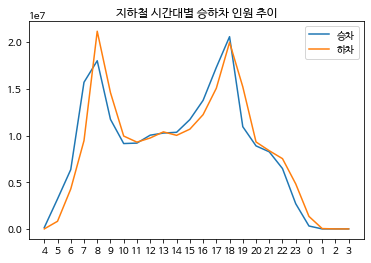

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(range(24), get_on_data.sum(), label = '승차')
plt.plot(range(24), get_off_data.sum(), label = '하차')
plt.legend()
plt.xticks(range(24), list(range(4,24)) + [0, 1, 2, 3])
plt.show()